## Memanggil Library

In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt

## Memanggil Dataset

Memanggil data1 yang berisi combined_data_1

In [2]:
data1 = pd.read_csv('./combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data1['Rating'] = data1['Rating'].astype(float)
print('Data1 shape: {}'.format(data1.shape))
print(data1.iloc[::5000000, :])

Data1 shape: (24058263, 2)
          Cust_Id  Rating
0              1:     NaN
5000000   2560324     4.0
10000000  2271935     2.0
15000000  1921803     2.0
20000000  1933327     3.0


Memanggil data2 yang berisi combined_data_2

In [3]:
data2 = pd.read_csv('./combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data2['Rating'] = data2['Rating'].astype(float)
print('Data2 shape: {}'.format(data2.shape))
print(data2.iloc[::5000000, :])

Data2 shape: (26982302, 2)
          Cust_Id  Rating
0           4500:     NaN
5000000    485565     2.0
10000000  1155911     2.0
15000000   121369     3.0
20000000  1277779     3.0
25000000   252632     5.0


Memanggil data3 yang berisi combined_data_3

In [4]:
data3 = pd.read_csv('./combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data3['Rating'] = data3['Rating'].astype(float)
print('Data3 shape: {}'.format(data3.shape))
print(data3.iloc[::5000000, :])

Data3 shape: (22605786, 2)
          Cust_Id  Rating
0           9211:     NaN
5000000   2071383     4.0
10000000  2485184     5.0
15000000   765311     2.0
20000000  1260161     3.0


Memanggil data4 yang berisi combined_data_4

In [5]:
data4 = pd.read_csv('./combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data4['Rating'] = data4['Rating'].astype(float)
print('Data4 shape: {}'.format(data4.shape))
print(data4.iloc[::5000000, :])

Data4 shape: (26851926, 2)
          Cust_Id  Rating
0          13368:     NaN
5000000    605496     5.0
10000000   285173     5.0
15000000   604335     5.0
20000000  2503632     5.0
25000000   470744     3.0


## Merge Dataset

Merge dataset data_combined_1 hingga data_combined_4

In [6]:
merge_dataset = data1
merge_dataset.index = np.arange(0,len(merge_dataset))
print('merge dataset shape: {}'.format(merge_dataset.shape))
print(merge_dataset.iloc[::5000000, :])

merge dataset shape: (24058263, 2)
          Cust_Id  Rating
0              1:     NaN
5000000   2560324     4.0
10000000  2271935     2.0
15000000  1921803     2.0
20000000  1933327     3.0


Mencari jumlah movies, customer, dan ratings

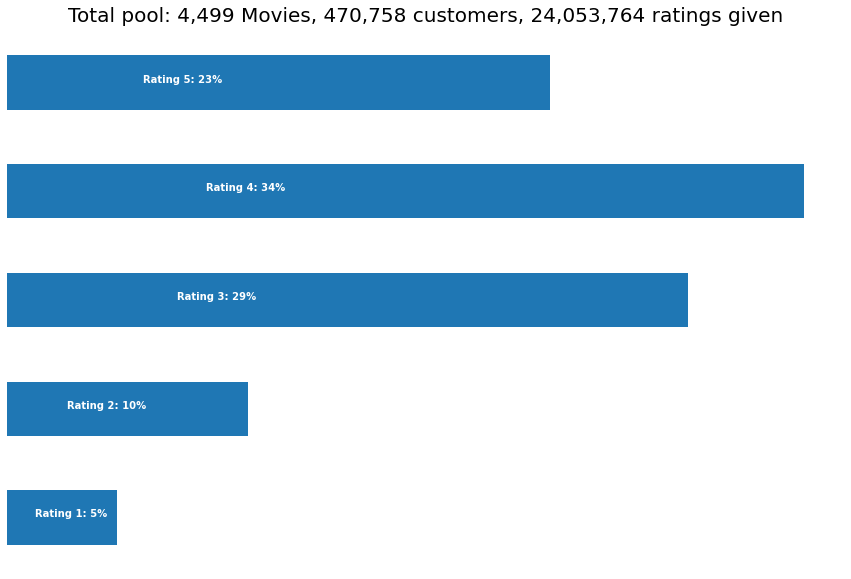

In [7]:
p = merge_dataset.groupby('Rating')['Rating'].agg(['count'])

movie_count = merge_dataset.isnull().sum()[1]

cust_count = merge_dataset['Cust_Id'].nunique() - movie_count

rating_count = merge_dataset['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')
            

## Data Cleaning

In [8]:
merge_dataset_nan = pd.DataFrame(pd.isnull(merge_dataset.Rating))
merge_dataset_nan = merge_dataset_nan[merge_dataset_nan['Rating'] == True]
merge_dataset_nan = merge_dataset_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(merge_dataset_nan['index'][1:],merge_dataset_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(merge_dataset) - merge_dataset_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [9]:
merge_dataset = merge_dataset[pd.notnull(merge_dataset['Rating'])]
merge_dataset['Movie_Id'] = movie_np.astype(int)
merge_dataset['Cust_Id'] = merge_dataset['Cust_Id'].astype(int)
print(merge_dataset.iloc[::5000000, :])

C:\Users\Personal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


C:\Users\Personal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
f = ['count','mean']
merge_dataset_movie_summary = merge_dataset.groupby('Movie_Id')['Rating'].agg(f)
merge_dataset_movie_summary.index = merge_dataset_movie_summary.index.map(int)
movie_benchmark = round(merge_dataset_movie_summary['count'].quantile(0.7),0)
drop_movie_list = merge_dataset_movie_summary[merge_dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

merge_dataset_cust_summary = merge_dataset.groupby('Cust_Id')['Rating'].agg(f)
merge_dataset_cust_summary.index = merge_dataset_cust_summary.index.map(int)
cust_benchmark = round(merge_dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = merge_dataset_cust_summary[merge_dataset_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0


In [11]:
merge_dataset = merge_dataset[~merge_dataset['Movie_Id'].isin(drop_movie_list)]
merge_dataset = merge_dataset[~merge_dataset['Cust_Id'].isin(drop_cust_list)]
print(merge_dataset.iloc[::5000000, :])

          Cust_Id  Rating  Movie_Id
696        712664     5.0         3
6932490   1299309     5.0      1384
13860273   400155     3.0      2660
20766530   466962     4.0      3923


In [12]:
merge_dataset_p = pd.pivot_table(merge_dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(merge_dataset_p.shape)

(143458, 1350)


## Data Mapping

In [13]:
merge_dataset_title = pd.read_csv('./movie_titles.csv', encoding='ISO-8859-1')
merge_dataset_title.head(10)

,1,2003,Dinosaur Planet,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2,2004.0,Isle of Man TT 2004 Review,NaN,NaN,NaN
1,3,1997.0,Character,NaN,NaN,NaN
2,4,1994.0,Paula Abdul's Get Up & Dance,NaN,NaN,NaN
3,5,2004.0,The Rise and Fall of ECW,NaN,NaN,NaN
4,6,1997.0,Sick,NaN,NaN,NaN
5,7,1992.0,8 Man,NaN,NaN,NaN
6,8,2004.0,What the #$*! Do We Know!?,NaN,NaN,NaN
7,9,1991.0,Class of Nuke 'Em High 2,NaN,NaN,NaN
8,10,2001.0,Fighter,NaN,NaN,NaN
9,11,1999.0,Full Frame: Documentary Shorts,NaN,NaN,NaN


In [14]:
merge_dataset_title = pd.read_csv('movie_titles.csv', encoding='ISO-8859-1')
columns = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
merge_dataset_title.drop(columns, inplace=True, axis=1)
merge_dataset_title.columns = ['movie_id', 'year', 'title']
merge_dataset_title.head(10)

,movie_id,year,title
0,2,2004.0,Isle of Man TT 2004 Review
1,3,1997.0,Character
2,4,1994.0,Paula Abdul's Get Up & Dance
3,5,2004.0,The Rise and Fall of ECW
4,6,1997.0,Sick
5,7,1992.0,8 Man
6,8,2004.0,What the #$*! Do We Know!?
7,9,1991.0,Class of Nuke 'Em High 2
8,10,2001.0,Fighter
9,11,1999.0,Full Frame: Documentary Shorts


In [15]:
merge_dataset_title.to_csv("merge_dataset_title.csv", index=False)

## Info Data

In [16]:
print("Total Data:")
print("Total number of movie ratings = "+str(merge_dataset.shape[0]))
print("Number of unique customer = "+str(len(np.unique(merge_dataset["Cust_Id"]))))
print("Number of unique movies = "+str(len(np.unique(merge_dataset["Movie_Id"]))))

Total Data:
Total number of movie ratings = 17337458
Number of unique customer = 143458
Number of unique movies = 1350


In [17]:
merge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 696 to 24056846
Data columns (total 3 columns):
Cust_Id     int32
Rating      float64
Movie_Id    int32
dtypes: float64(1), int32(2)
memory usage: 396.8 MB


In [18]:
merge_dataset.describe()

,Cust_Id,Rating,Movie_Id
count,1.733746e+07,1.733746e+07,1.733746e+07
mean,1.321158e+06,3.590570e+00,2.302783e+03
std,7.646923e+05,1.062665e+00,1.303458e+03
min,6.000000e+00,1.000000e+00,3.000000e+00
25%,6.602280e+05,3.000000e+00,1.176000e+03
50%,1.316775e+06,4.000000e+00,2.342000e+03
75%,1.983213e+06,4.000000e+00,3.433000e+03
max,2.649429e+06,5.000000e+00,4.496000e+03


Melihat data yang null

In [19]:
merge_dataset.isna().sum()

Cust_Id     0
Rating      0
Movie_Id    0
dtype: int64

## Implementing Apriori Algorithm

In [21]:
# Import library
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#mlxtend melakukan import fungsi apriori dan association_rules

In [22]:
# Merancang kondisi yang mengindikasi movie dengan rating terpopuler
merge_dataset["Populer"] = merge_dataset["Rating"] > 3

# Melihat fitur baru dengan menampilkan data set
merge_dataset[10:15]

merge_dataset[merge_dataset["Cust_Id"] == 1][:5]

,Cust_Id,Rating,Movie_Id,Populer


In [23]:
# Menampilkan movie dengan rating terpopuler
merge_dataset.head()

,Cust_Id,Rating,Movie_Id,Populer
696,712664,5.0,3,True
697,1331154,4.0,3,True
698,2632461,3.0,3,False
699,44937,5.0,3,True
700,656399,4.0,3,True


In [24]:
# Mengambil sampel data set untuk membentuk training set
# Mendapatkan semua ulasan dari 3000 customer pertama
ratings = merge_dataset[merge_dataset['Cust_Id'].isin(range(3000))]

In [25]:
# Membuat data set dari ulasan yang baik saja di dalam sampel
favorable_ratings = ratings[ratings["Populer"]]

In [26]:
# Mencari ulasan yang menguntungkan dari pengguna untuk itemset (film yang setiap pengguna telah memberikan ulasan yang baik)
# Mengelompokkan dataset oleh Cust_Id dan iterasi atas film di setiap kelompok
favorable_reviews_by_customers = dict((k, frozenset(v.values)) for k, v in favorable_ratings.groupby("Cust_Id")["Movie_Id"])

In [27]:
# Melihat lima film terbaik
num_favorable_by_movie = ratings[["Movie_Id", "Populer"]].groupby("Movie_Id").sum()
num_favorable_by_movie.sort_values(by="Populer", ascending=False).head()

,Populer
Movie_Id,
4306,94.0
1905,92.0
2452,89.0
3962,86.0
2862,84.0


In [28]:
# Membuat initial frequent itemset
frequent_itemsets = {} 
min_support = 50

In [29]:
# Membuat itemset dengan setiap film secara individual dan menguji apakah itemset tersebut frekuen
# Menggunakan method frozenset
frequent_itemsets[1] = dict((frozenset((Movie_Id,)), row["Populer"])
                                for Movie_Id, row in num_favorable_by_movie.iterrows()
                                if row["Populer"] > min_support)

print("Terdapat {} movies dengan lebih dari {} favorable reviews".format(len(frequent_itemsets[1]), min_support))


Terdapat 20 movies dengan lebih dari 50 favorable reviews


In [30]:
import sys
# Mengatur fungsi dan counting dictionary
from collections import defaultdict

def find_frequent_itemsets(favorable_reviews_by_customers, k_1_itemsets, min_support):
    counts = defaultdict(int)

# Melakukan iterasi pada semua pengguna dan ulasan mereka
    for user, reviews in favorable_reviews_by_customers.items():
# Melihat setiap itemset yang ditemukan sebelumnya 
         for itemset in k_1_itemsets:
            if itemset.issubset(reviews):
# Membuat superset dari pengguna yang tidak ada dalam itemse
                for other_reviewed_movie in reviews - itemset:
                    current_superset = itemset | frozenset((other_reviewed_movie,))
                    counts[current_superset] += 1
# Mengakhiri fungsi kita dengan menguji candidate itemset 
    return dict([(itemset, frequency) for itemset, frequency in counts.items()
                 if frequency >= min_support])
# Membuat frequent itemset dan menyimpan mereka di dalam dictionary sesuai dengan panjangnya
for k in range(2, 20):
    cur_frequent_itemsets = find_frequent_itemsets(favorable_reviews_by_customers,
                                                  frequent_itemsets[k-1],
                                                  min_support)
# Memecah loop sebelumnya jika tidak menemukan frequent itemset yang baru
    if len(cur_frequent_itemsets)==0:
        print("Did not find any frequent itemsets of length {}".format(k))
        sys.stdout.flush()
        break
        
    else:
        print("I found {} frequent itemsets of length {}".format(len(cur_frequent_itemsets), k))
        frequent_itemsets[k] = cur_frequent_itemsets
del frequent_itemsets[1]

I found 173 frequent itemsets of length 2
I found 770 frequent itemsets of length 3
I found 1912 frequent itemsets of length 4
I found 2909 frequent itemsets of length 5
I found 2799 frequent itemsets of length 6
I found 1711 frequent itemsets of length 7
I found 657 frequent itemsets of length 8
I found 152 frequent itemsets of length 9
I found 18 frequent itemsets of length 10
I found 1 frequent itemsets of length 11
Did not find any frequent itemsets of length 12


## Extracting Association Rules

In [31]:
# Menghasilkan daftar semua aturan dari masing-masing frequent itemset
candidate_rules = []
for itemsets_length, itemset_counts in frequent_itemsets.items():
    for itemset in itemset_counts.keys():
        for conclusion in itemset:
            premise = itemset - set((conclusion,))
            candidate_rules.append((premise, conclusion))
            
print("Terdapat {} candidate rules".format(len(candidate_rules)))

Terdapat 60435 candidate rules


In [32]:
#  elihat beberapa  aturan kandidat dengan mencetak beberapa aturan pertama dalam list
print(candidate_rules[:5])

[(frozenset({2452}), 457), (frozenset({457}), 2452), (frozenset({457}), 3624), (frozenset({3624}), 457), (frozenset({2862}), 457)]


In [33]:
#  Menghitung confidence setiap rule tersebut
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)

In [34]:
# Melakukan iterasi pada semua pengguna dan favorable reviews mereka dalam setiap candidate association rule
for user, reviews in favorable_reviews_by_customers.items():
    for candidate_rule in candidate_rules:
        premise, conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
# Menghitung confidence setiap aturan dengan membagi correct count dengan total aturan tersebut
rule_confidence = { candidate_rule: correct_counts[candidate_rule] / 
               float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule])
               for candidate_rule in candidate_rules}

In [35]:
# Mencetak lima aturan teratas dengan mengurutkan confidence dictionary
from operator import itemgetter

sorted_confidence = sorted(rule_confidence.items(), key=itemgetter(1), reverse=True)
for index in range(5):
    print("Rule #{0}".format(index + 1 ))
    (premise, conclusion) = sorted_confidence[index][0]
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise, conclusion))
    print(" - Confidence: {0:.3f}\n".format(rule_confidence[(premise, conclusion)]))

Rule #1
Rule: If a person recommends frozenset({3624, 457, 3962}) they will also recommend 1905
 - Confidence: 1.000

Rule #2
Rule: If a person recommends frozenset({457, 3962, 1220}) they will also recommend 1905
 - Confidence: 1.000

Rule #3
Rule: If a person recommends frozenset({1962, 2452, 2372}) they will also recommend 1905
 - Confidence: 1.000

Rule #4
Rule: If a person recommends frozenset({457, 3962, 571}) they will also recommend 1905
 - Confidence: 1.000

Rule #5
Rule: If a person recommends frozenset({4432, 1905, 886}) they will also recommend 2372
 - Confidence: 1.000



In [36]:
#  mencetak aturan teratas untuk juga menyertakan judul film
def get_merge_dataset_title(movie_id):
    title_object = merge_dataset_title[merge_dataset_title["movie_id"] == movie_id]["title"]
    title = title_object.values[0]
    return title

for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_names = ", ".join(get_merge_dataset_title(idx) for idx in premise)
    conclusion_name = get_merge_dataset_title(conclusion)
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise_names, conclusion))
    print(" - Confidence: {0:.3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: If a person recommends The Last Samurai, Kill Bill: Vol. 2, Finding Nemo (Widescreen) they will also recommend 1905
 - Confidence: 1.000

Rule #2
Rule: If a person recommends Kill Bill: Vol. 2, Finding Nemo (Widescreen), Man on Fire they will also recommend 1905
 - Confidence: 1.000

Rule #3
Rule: If a person recommends 50 First Dates, Lord of the Rings: The Fellowship of the Ring, The Bourne Supremacy they will also recommend 1905
 - Confidence: 1.000

Rule #4
Rule: If a person recommends Kill Bill: Vol. 2, Finding Nemo (Widescreen), American Beauty they will also recommend 1905
 - Confidence: 1.000

Rule #5
Rule: If a person recommends The Italian Job, Pirates of the Caribbean: The Curse of the Black Pearl, Ray they will also recommend 2372
 - Confidence: 1.000



# Evaluation

Pertama, kita mengekstrak test set, yang merupakan semua recordyang tidak kita gunakan dalam training set. Kita menggunakan  3000 customer pertama  (berdasarkan  nilai  ID)  untuk training  set,  dan kita akan menggunakan sisanya untuk test set. Seperti halnya training set, kita juga akan mendapatkan ulasan yang menarikuntuk masing-masing pengguna dalam dataset ini juga

Kita kemudian menghitung instanceyang benar di mana premisnyamengarah ke kesimpulan, dengan cara yang samasepertiyang kita lakukan sebelumnya. Satu-satunya perubahan di sini adalah penggunaan data uji dan bukan data pelatihan.

In [45]:
test_dataset = merge_dataset[merge_dataset['Cust_Id'].isin(range(3000))]
test_populer = test_dataset[test_dataset["Populer"]]
test_populer_by_cust = dict((k, frozenset(v.values))
    for k, v in test_populer.groupby("Cust_Id")["Movie_Id"])

correct_counts=defaultdict(int)
incorrect_counts=defaultdict(int)
for user, reviews in test_populer_by_cust.items():
    for candidate_rule in candidate_rules:
        premise,conclusion=candidate_rule
        
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule]+=1
            else:
                incorrect_counts[candidate_rule]+=1

In [46]:
#Kemudian,kita hitung confidencesetiap aturan dari jumlah yang benar (correct_counts).
test_confidence = {candidate_rule:
                  (correct_counts[candidate_rule] / 
                  float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule]))
                  for candidate_rule in rule_confidence}

#mencetak aturan asosiasi terbaik dengan judul.
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_names = ", ".join(get_merge_dataset_title(idx) for idx in premise)
    conclusion_name = get_merge_dataset_title(conclusion)
    print("Rule : if a person recommends {0} they will also recommend {1}"
         .format(premise_names, conclusion_name))
    print(" - Train confidence: {0:.3f}".format(rule_confidence.get((premise, conclusion), -1)))
    print("- Test Confidence: {0:.3f}\n".format(test_confidence.get((premise, conclusion), -1)))

Rule #1
Rule : if a person recommends The Last Samurai, Kill Bill: Vol. 2, Finding Nemo (Widescreen) they will also recommend Pirates of the Caribbean: The Curse of the Black Pearl
 - Train confidence: 1.000
- Test Confidence: 1.000

Rule #2
Rule : if a person recommends Kill Bill: Vol. 2, Finding Nemo (Widescreen), Man on Fire they will also recommend Pirates of the Caribbean: The Curse of the Black Pearl
 - Train confidence: 1.000
- Test Confidence: 1.000

Rule #3
Rule : if a person recommends 50 First Dates, Lord of the Rings: The Fellowship of the Ring, The Bourne Supremacy they will also recommend Pirates of the Caribbean: The Curse of the Black Pearl
 - Train confidence: 1.000
- Test Confidence: 1.000

Rule #4
Rule : if a person recommends Kill Bill: Vol. 2, Finding Nemo (Widescreen), American Beauty they will also recommend Pirates of the Caribbean: The Curse of the Black Pearl
 - Train confidence: 1.000
- Test Confidence: 1.000

Rule #5
Rule : if a person recommends The Italian